# Leaf Classification

## Introduction

The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import cv2
import os

## Read Data

In [2]:
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

## Describe Data

In [3]:
train_df.shape

(990, 194)

In [4]:
test_df.shape

(594, 193)

In [5]:
train_df.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


train dataset has the shape of [990x194]. 990 represents the number of species, and 194 represents individual features in columns i.e. 'id', 'species', 'margin1-64', 'shape1-64', 'texture1-64'.

More in detail for 194:
<ul>  
<li>  id - an anonymous id unique to an image</li>
<li>species - 99 species, not given in test.csv</li>
<li>margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature</li>
<li>shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature</li>
<li>texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature</li>
</ul>

In [6]:
test_df.head(5)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [7]:
train_df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [8]:
test_df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [9]:
train_df.dtypes

id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

In [10]:
test_df.dtypes

id             int64
margin1      float64
margin2      float64
margin3      float64
margin4      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 193, dtype: object

## Null Check

In [11]:
print(f'{train_df.isnull().sum().sum()} null values in training set')

0 null values in training set


In [12]:
print(f'{test_df.isnull().sum().sum()} null values in testing set')

0 null values in testing set


## Duplicates Check

In [13]:
print(f'{train_df.duplicated().sum()} duplicated items in training set')

0 duplicated items in training set


In [14]:
print(f'{test_df.duplicated().sum()} duplicated items in testing set')

0 duplicated items in testing set


## Visualizations

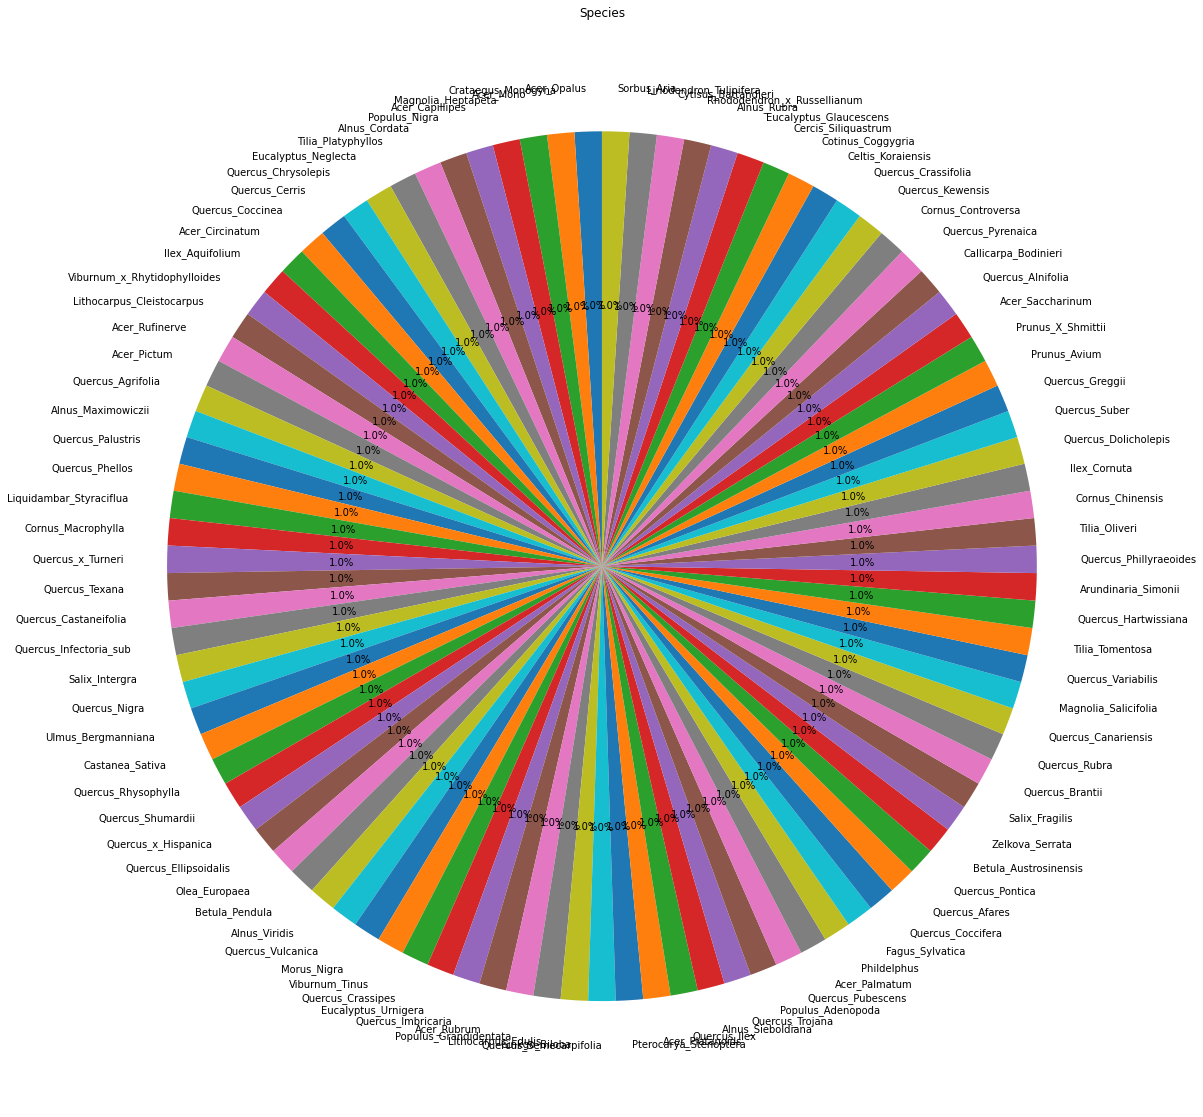

In [15]:
species_counts = train_df['species'].value_counts()
plt.figure(figsize=(30, 20))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette())
plt.title('Species')
plt.show()

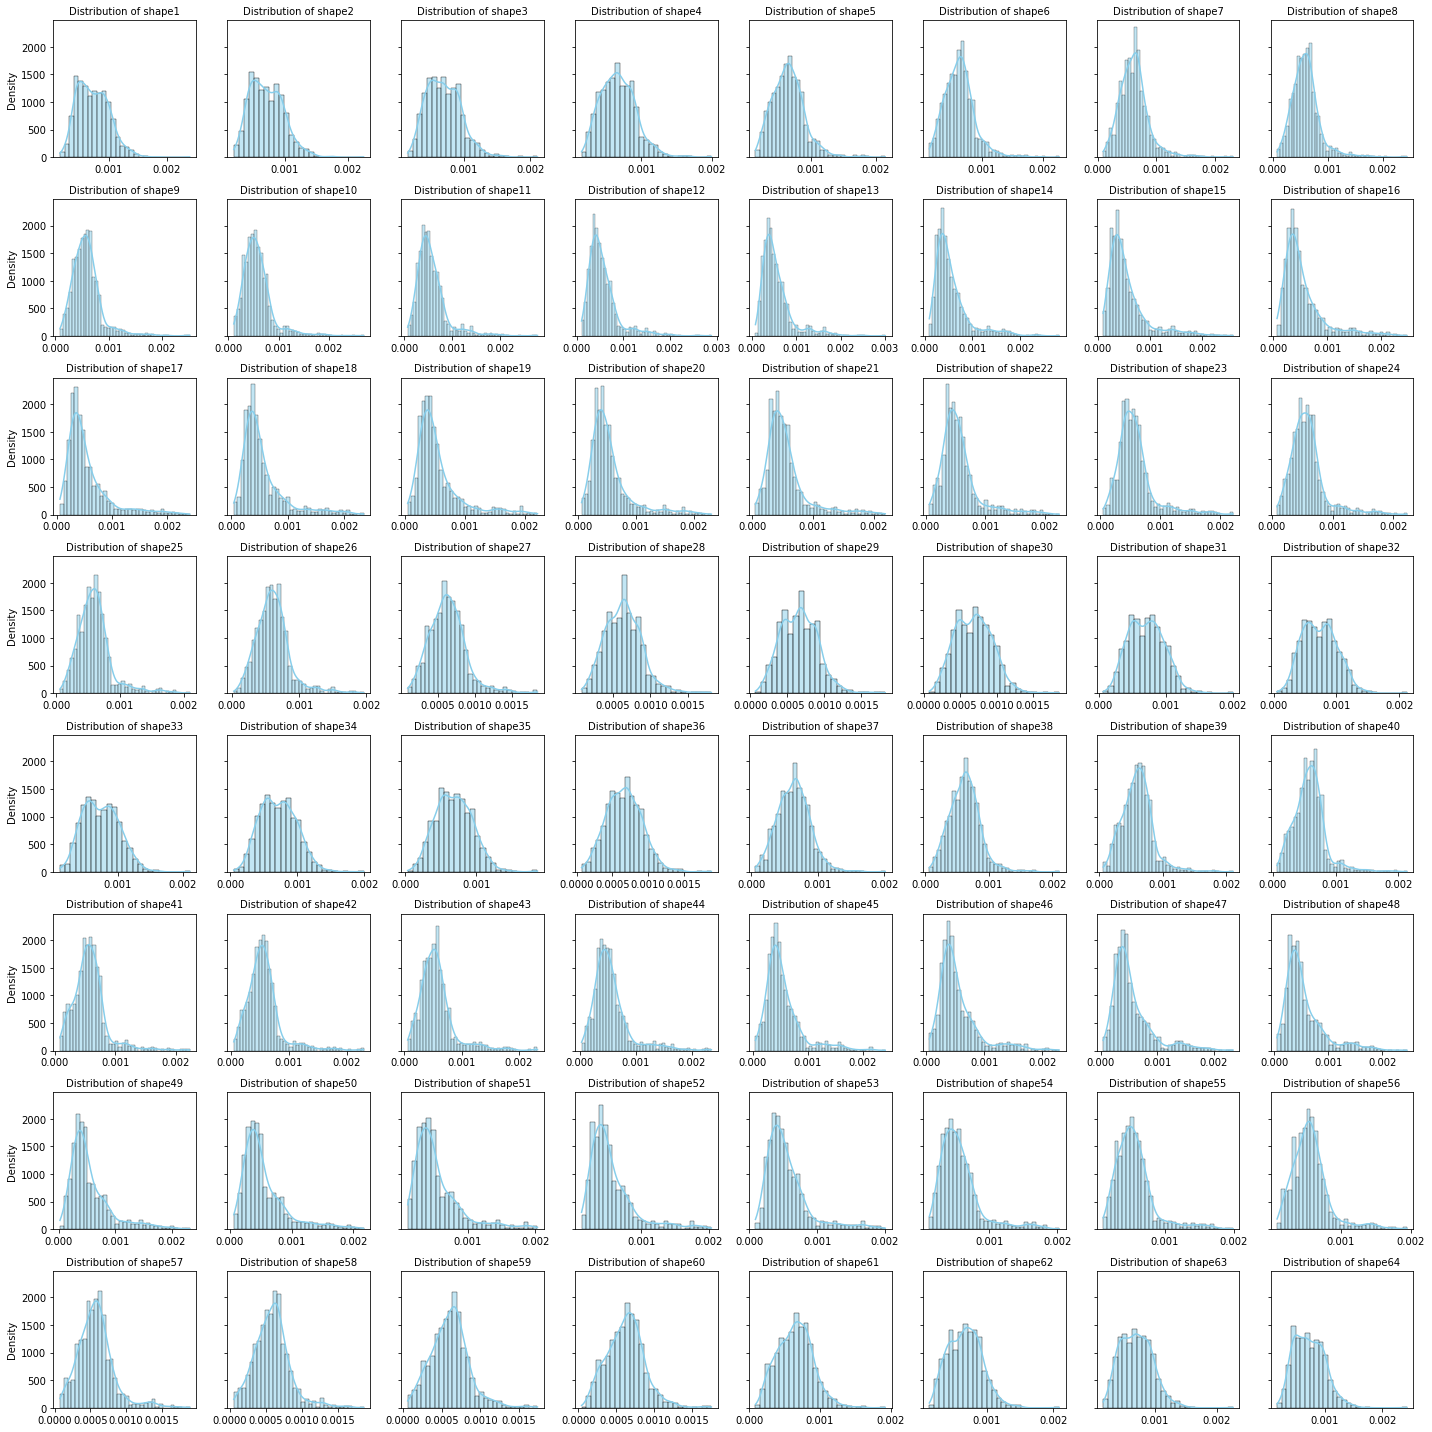

In [16]:
shape_features = train_df.loc[:, 'shape1':'shape64']
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), sharey=True)
axes = axes.flatten()
for i, column in enumerate(shape_features.columns):
    sns.histplot(shape_features[column], kde=True, ax=axes[i], color='skyblue', stat='density')
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

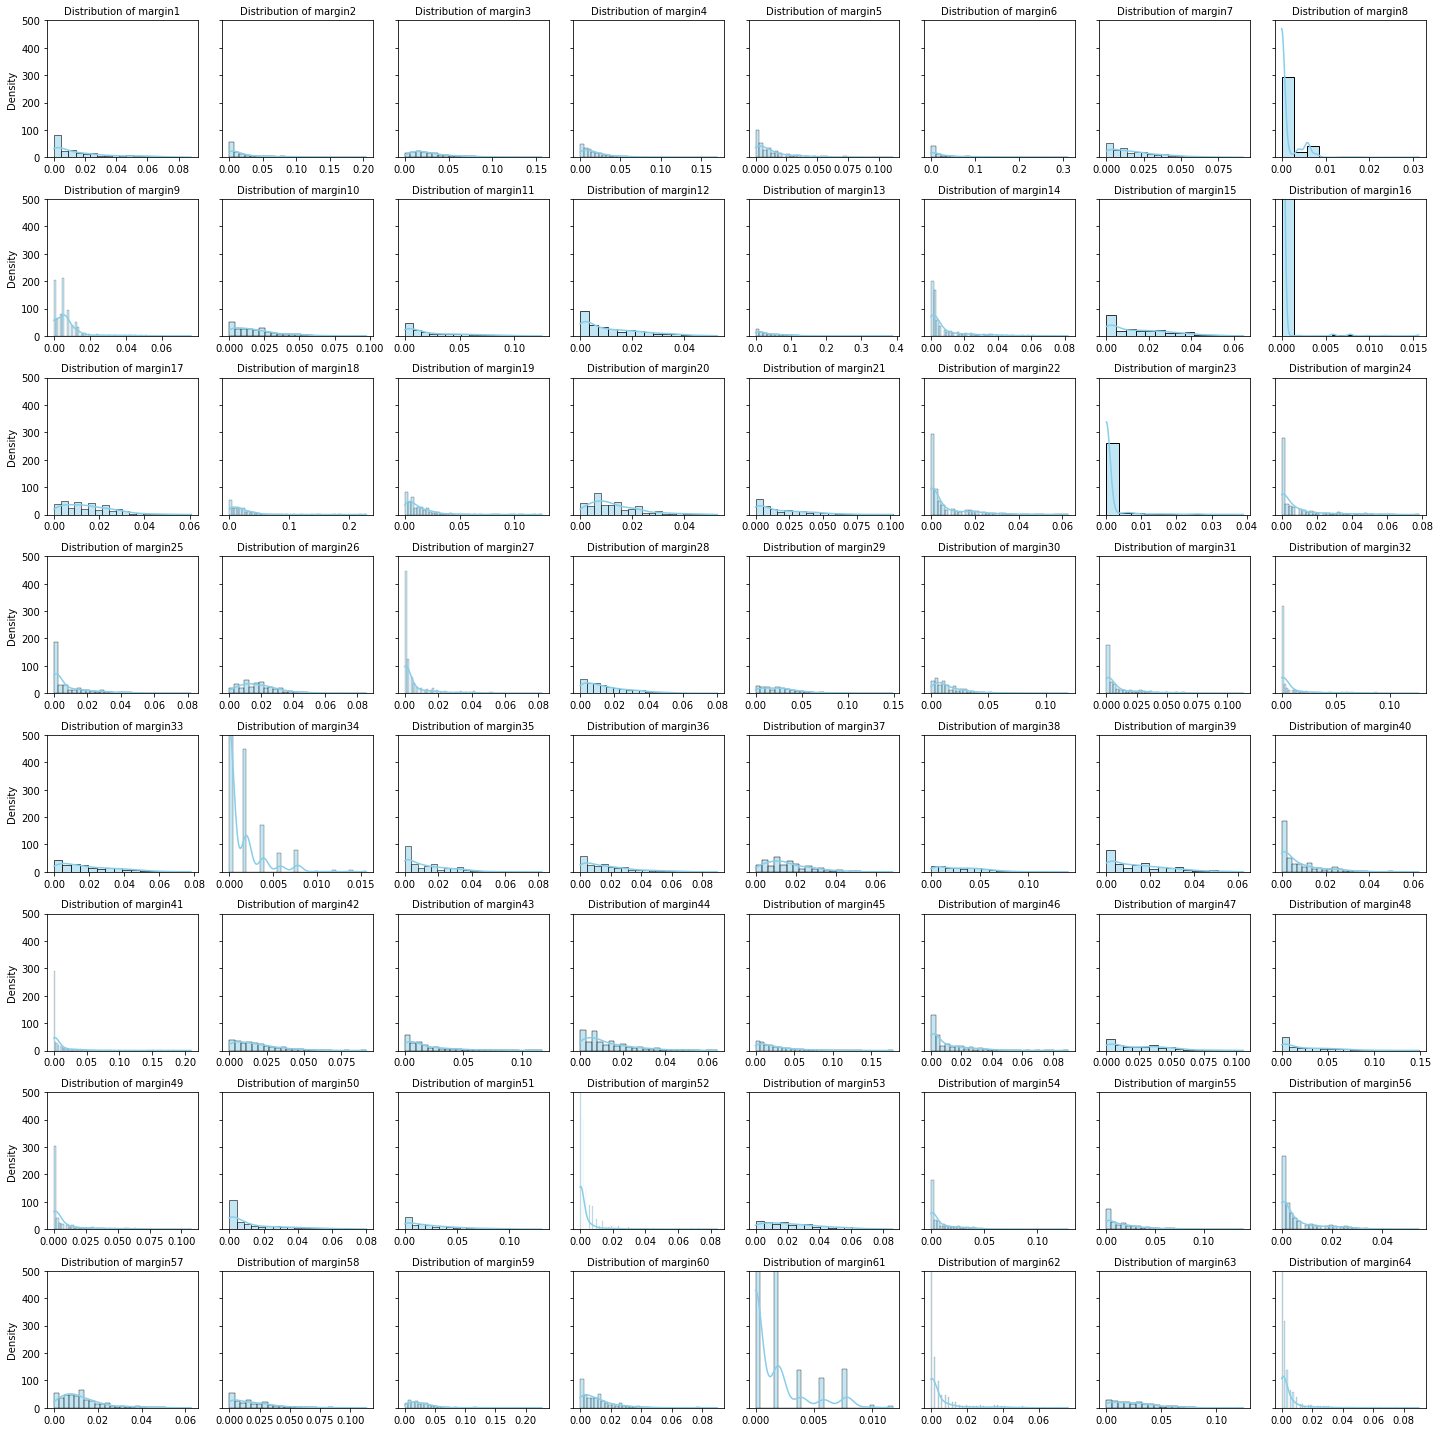

In [17]:
margin_features = train_df.loc[:, 'margin1':'margin64']
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), sharey=True)
axes = axes.flatten()
for i, column in enumerate(margin_features.columns):
    sns.histplot(margin_features[column], kde=True, ax=axes[i], color='skyblue', stat='density')
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].set_ylim(0, 500)
plt.tight_layout()
plt.show()

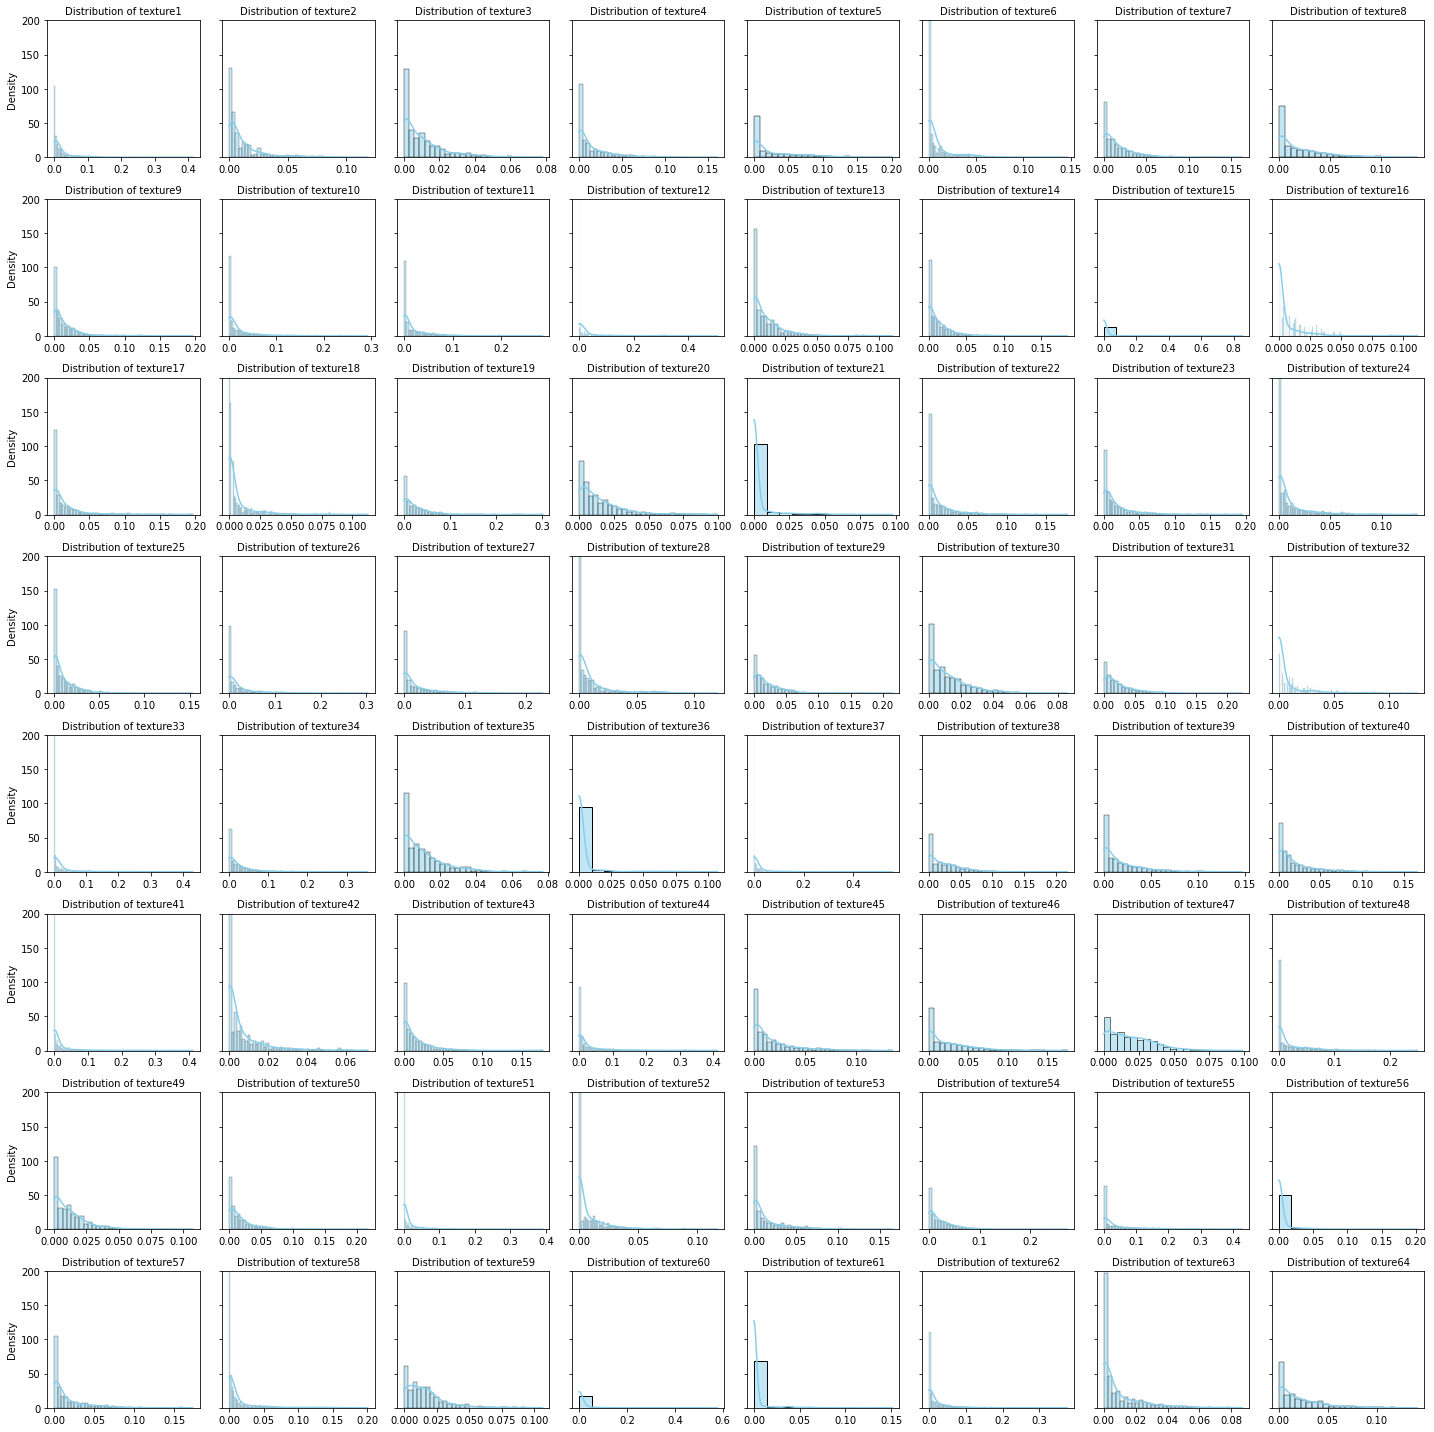

In [18]:
texture_features = train_df.loc[:, 'texture1':'texture64']
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), sharey=True)
axes = axes.flatten()
for i, column in enumerate(texture_features.columns):
    sns.histplot(texture_features[column], kde=True, ax=axes[i], color='skyblue', stat='density')
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].set_ylim(0,200)
plt.tight_layout()
plt.show()

## Some Images

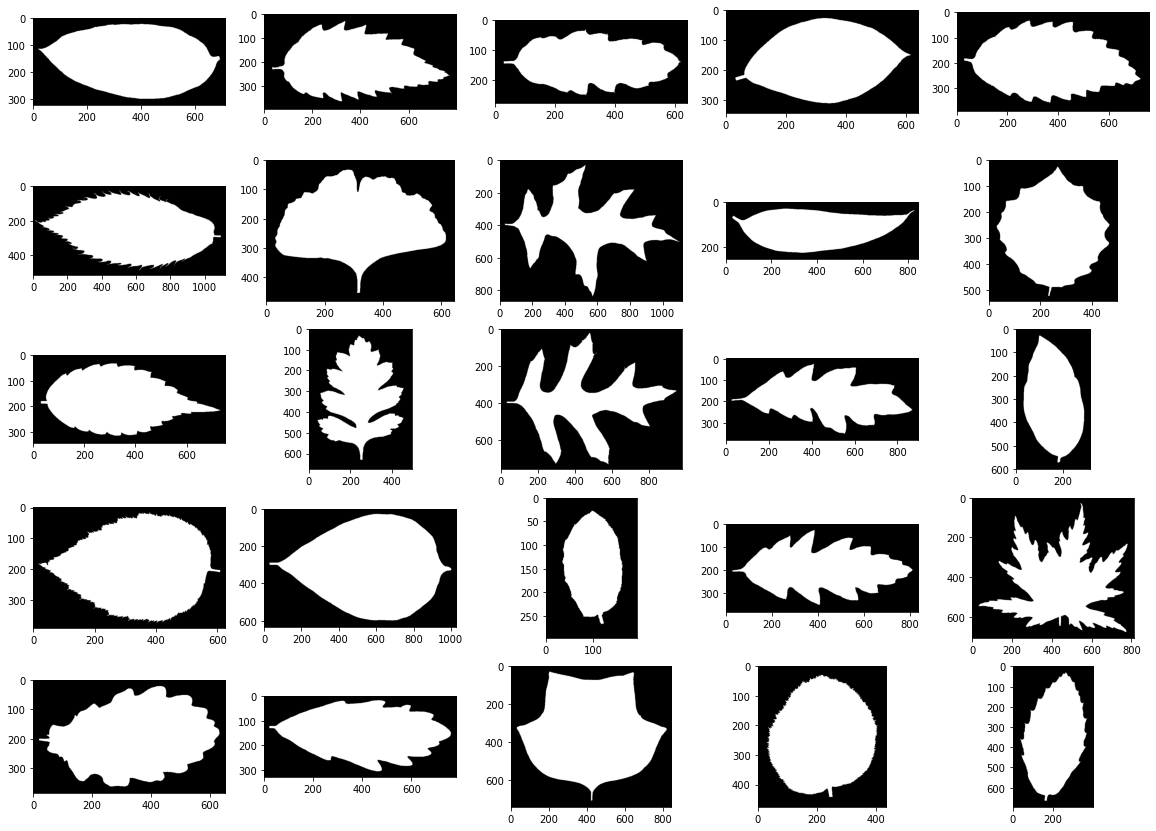

In [19]:
plt.figure(figsize=(20,15))
for i in range(25):
    j=np.random.choice((os.listdir('Data/images')))
    plt.subplot(5,5,i+1)
    img=cv2.imread(os.path.join('Data/images',j))
    plt.imshow(img)

## Correlation Analysis

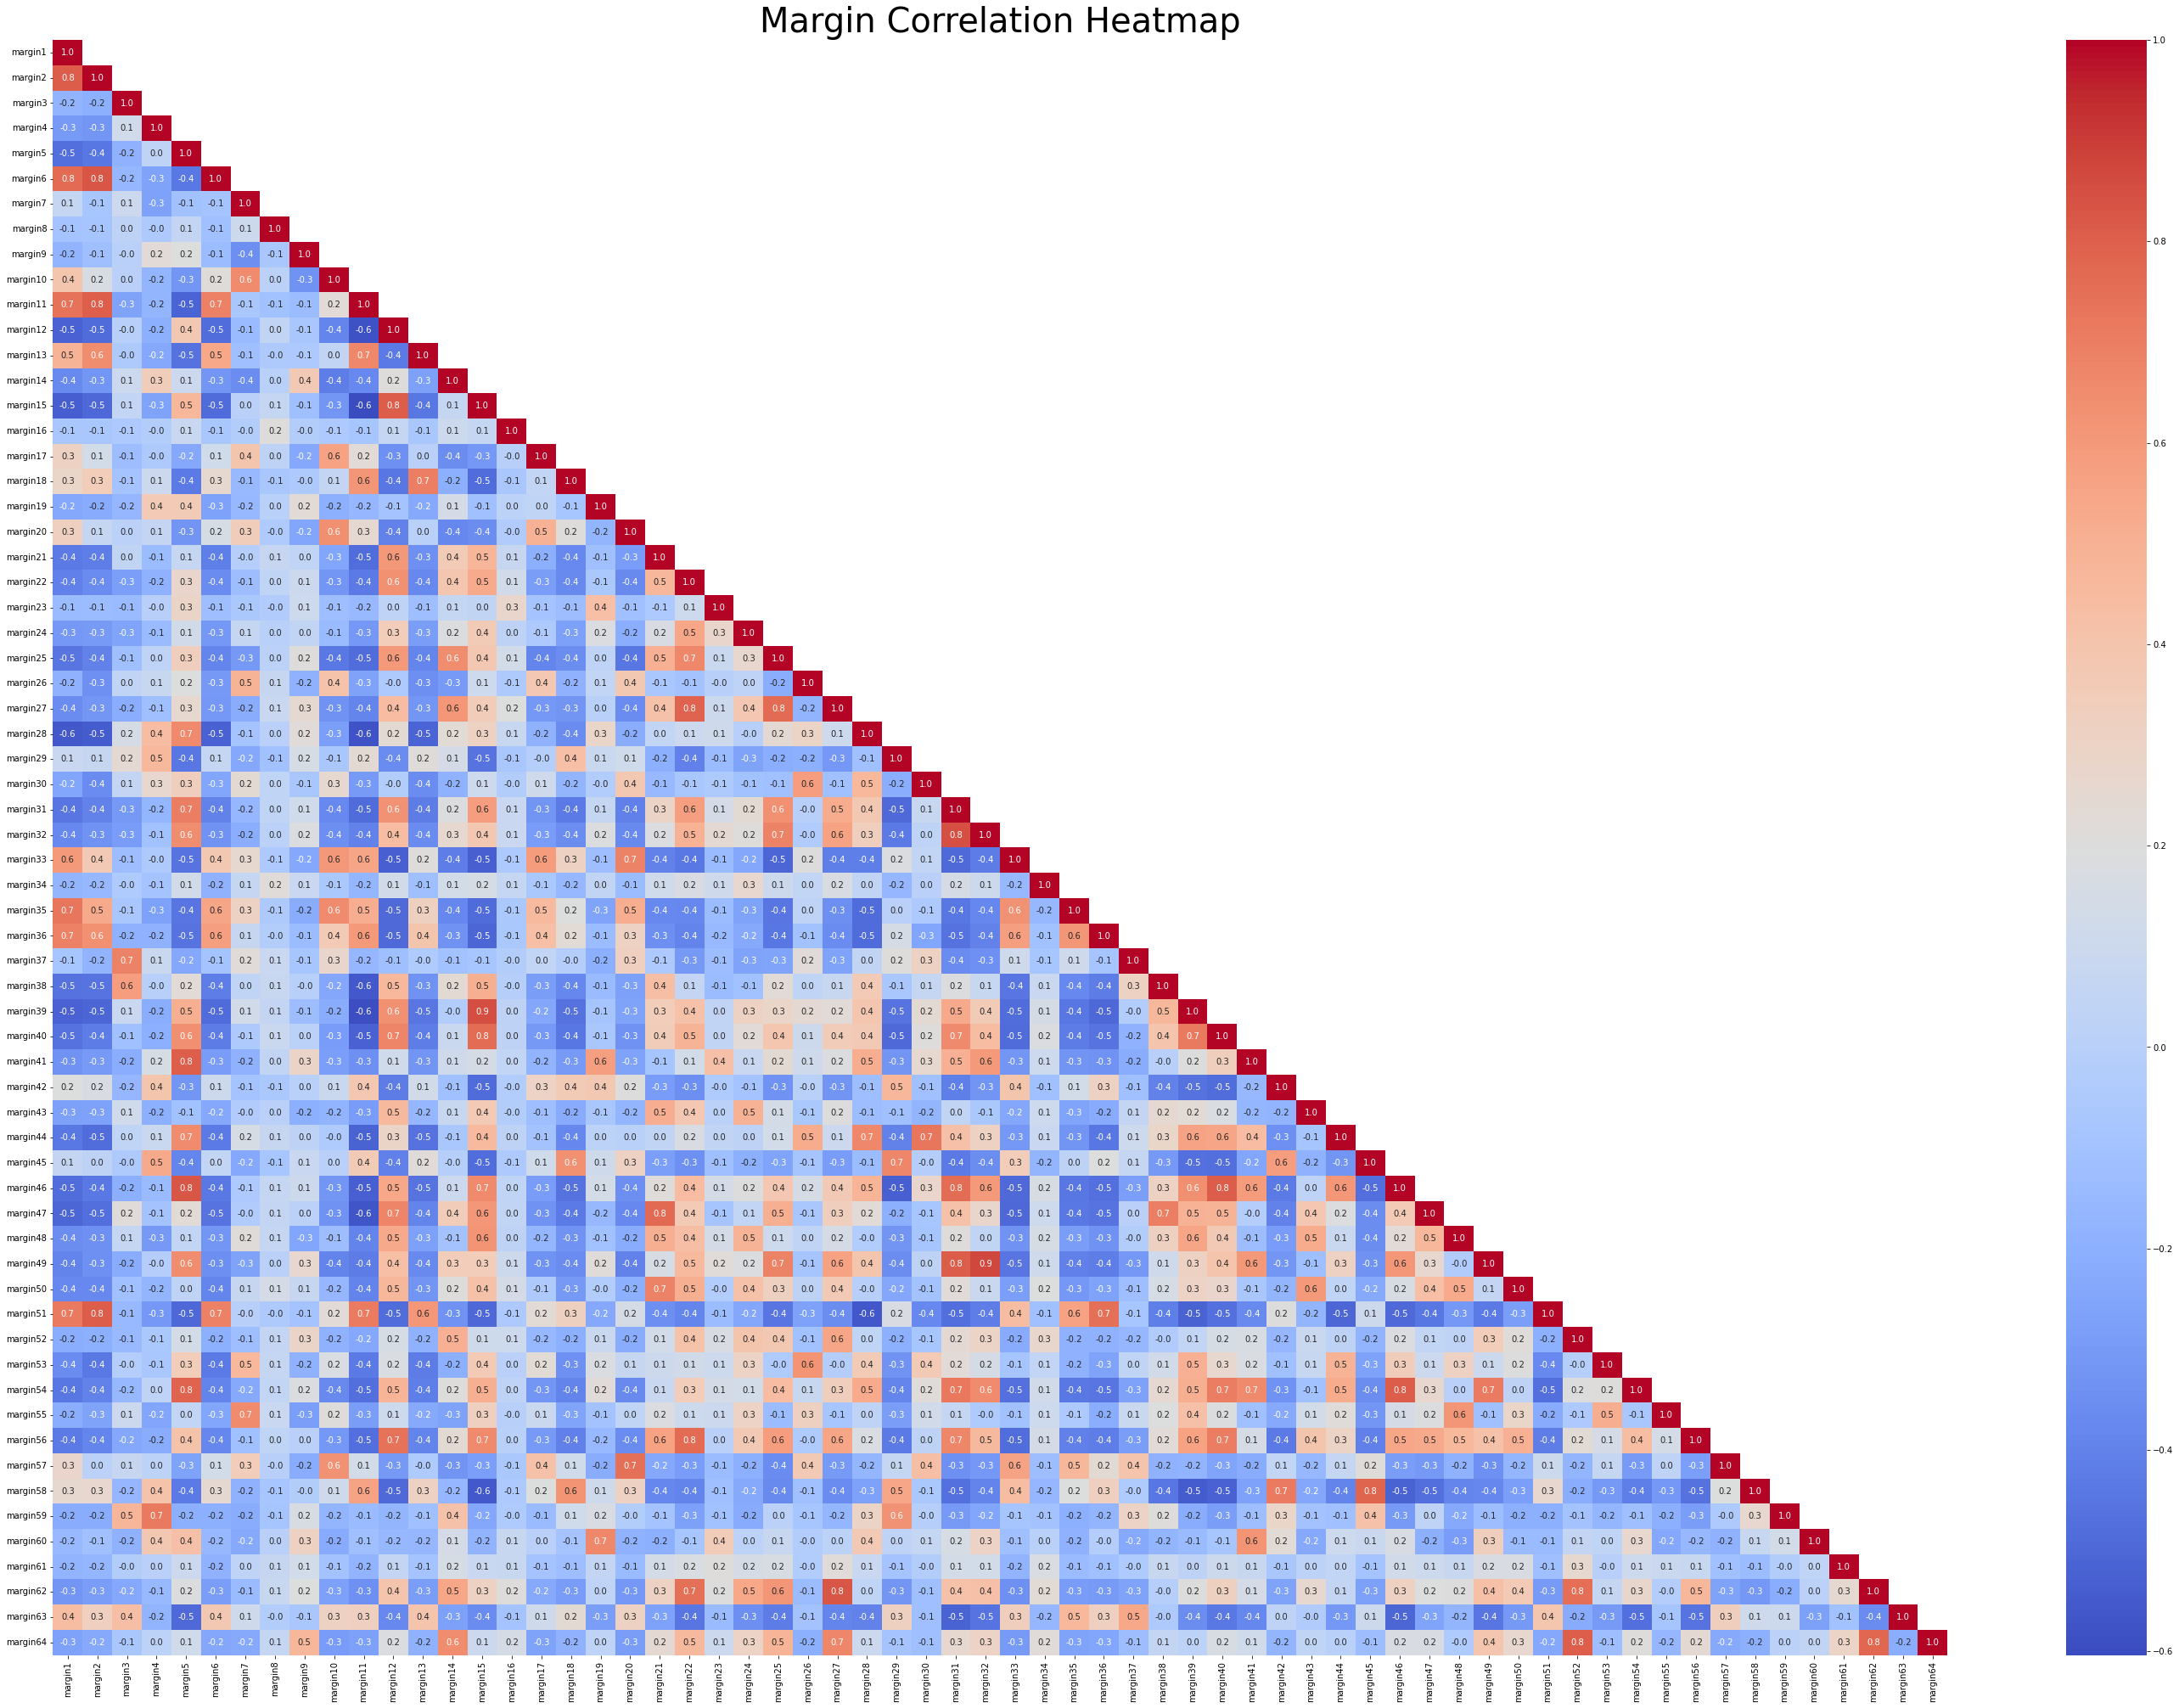

In [20]:
margin_correlation_matrix = train_df.loc[:, 'margin1':'margin64'].corr()
plt.figure(figsize=(50, 35))
sns.heatmap(margin_correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f",mask = np.triu(np.ones_like(margin_correlation_matrix, dtype=bool),k=1))
plt.title('Margin Correlation Heatmap',fontsize=40)
plt.show()

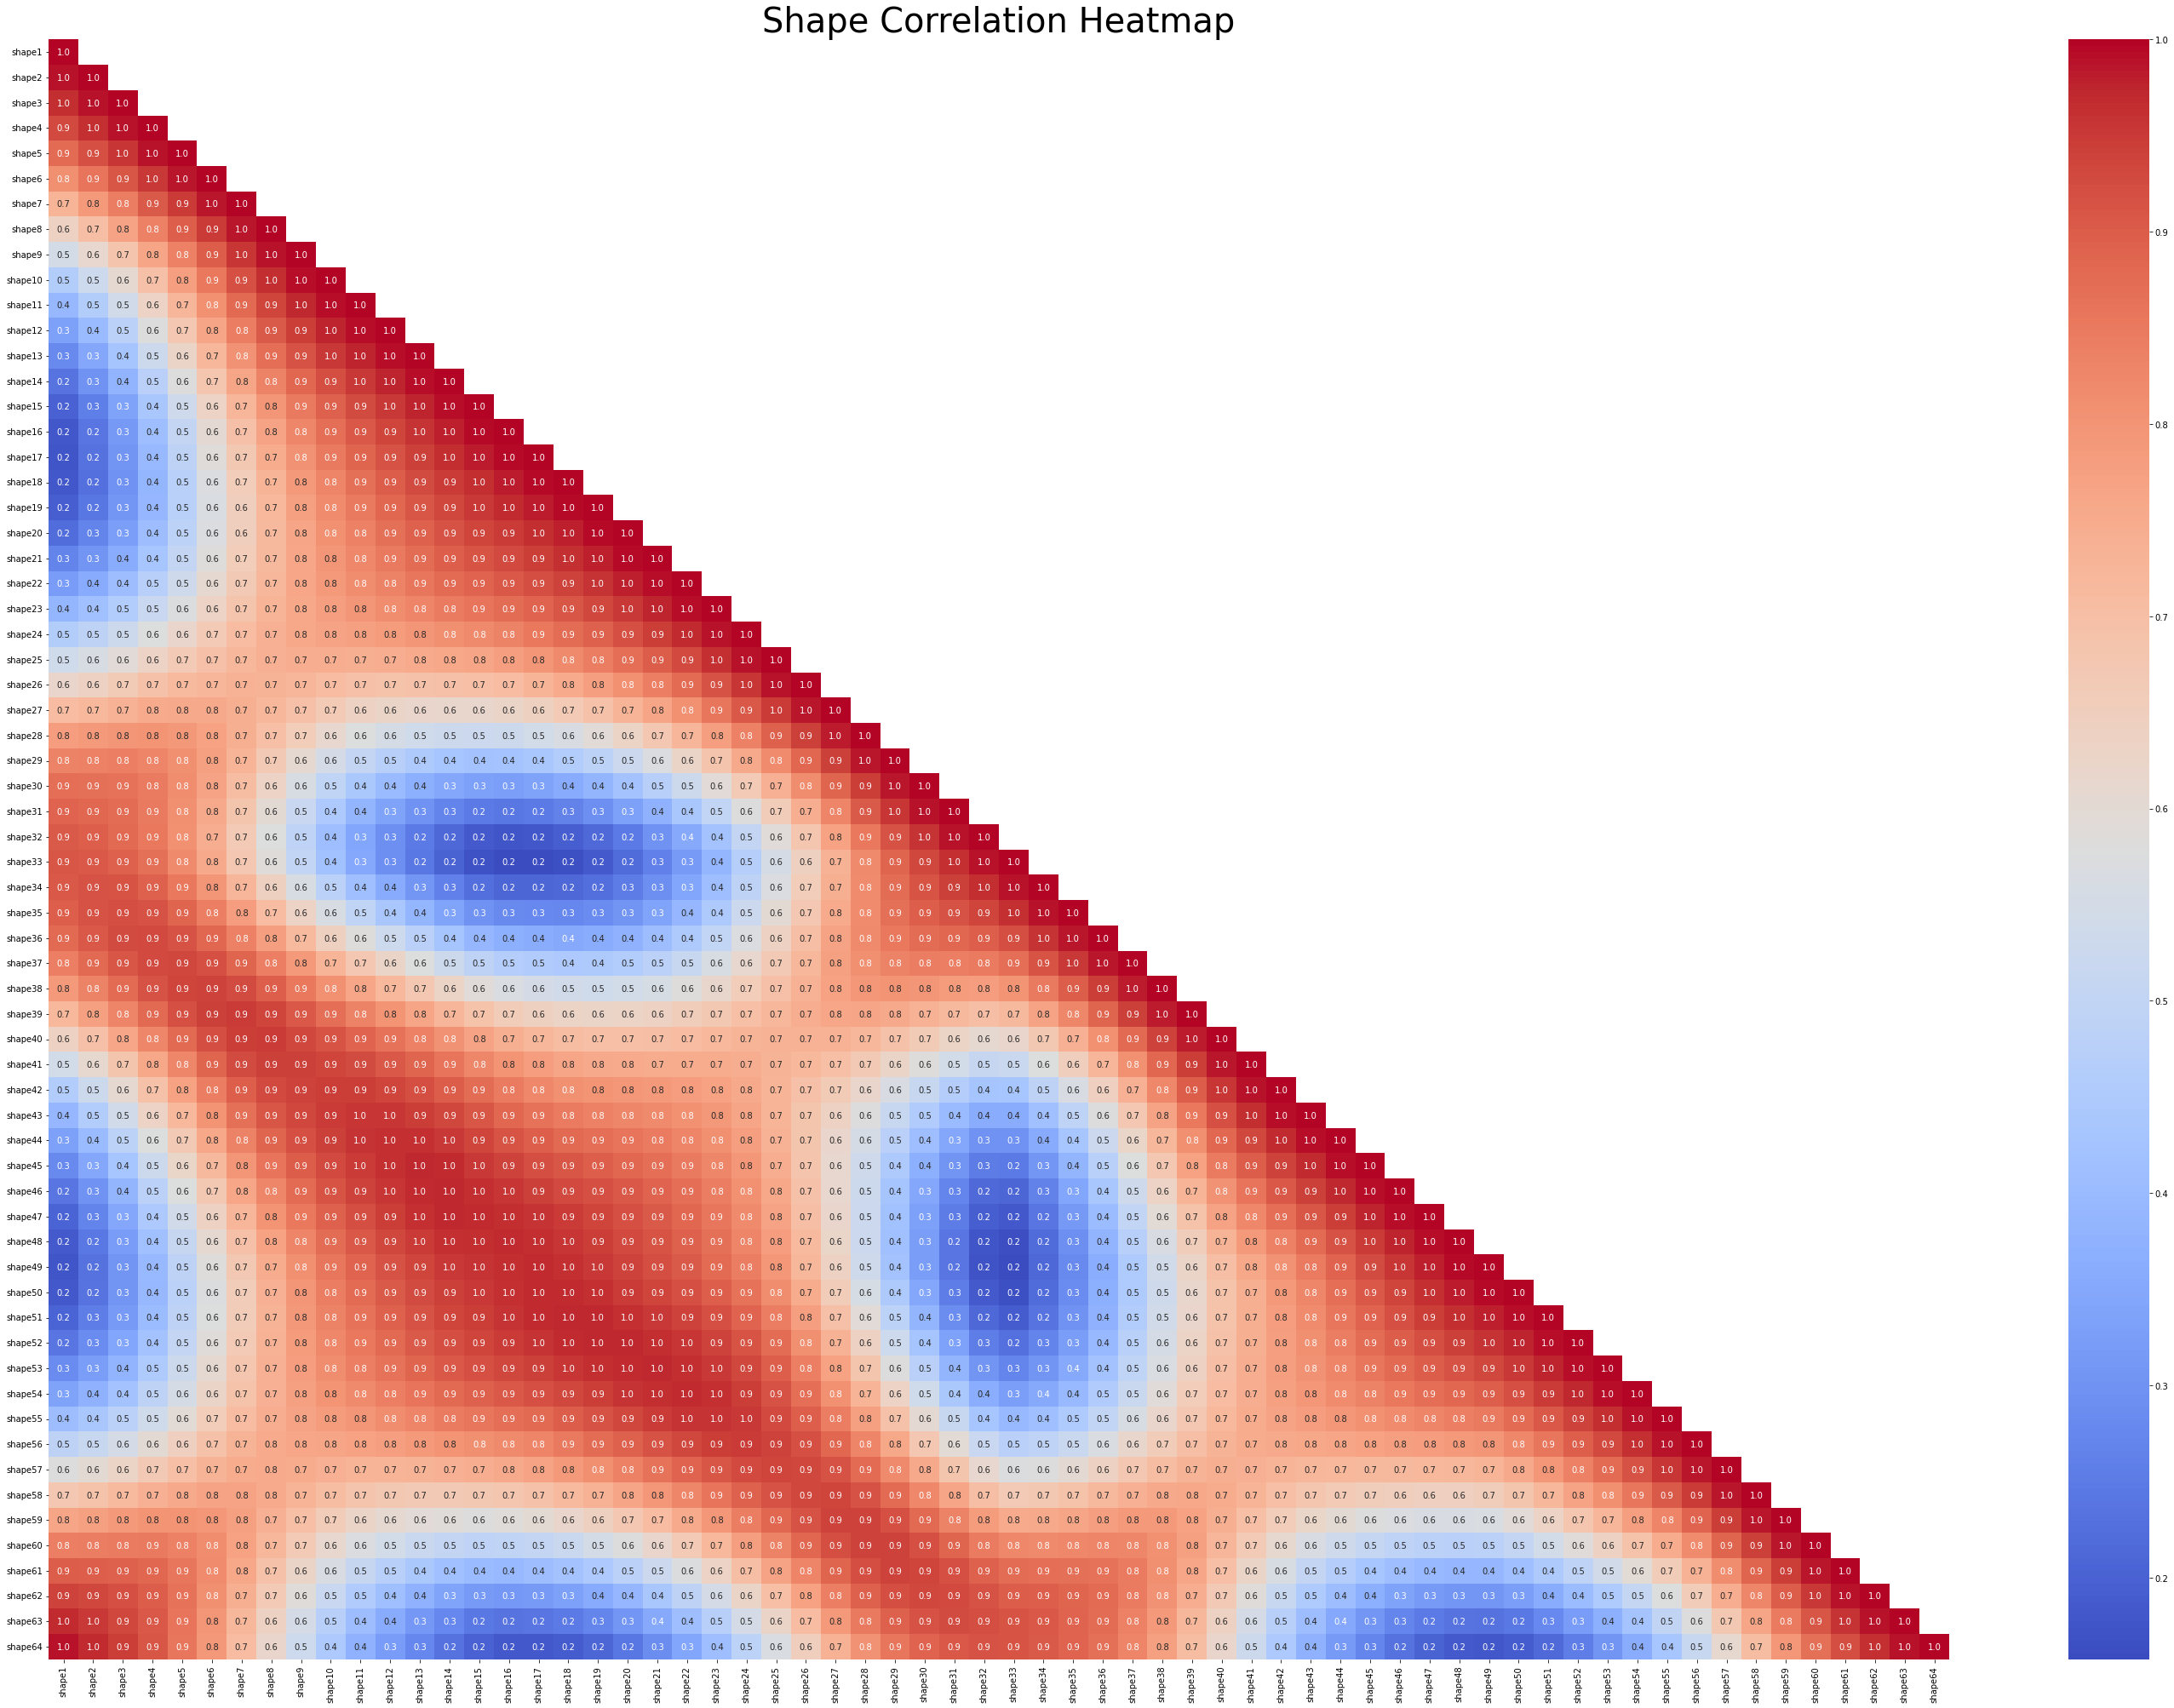

In [21]:
shape_correlation_matrix = train_df.loc[:, 'shape1':'shape64'].corr()
plt.figure(figsize=(50, 35))
sns.heatmap(shape_correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f",mask = np.triu(np.ones_like(shape_correlation_matrix, dtype=bool),k=1))
plt.title('Shape Correlation Heatmap',fontsize=40)
plt.show()

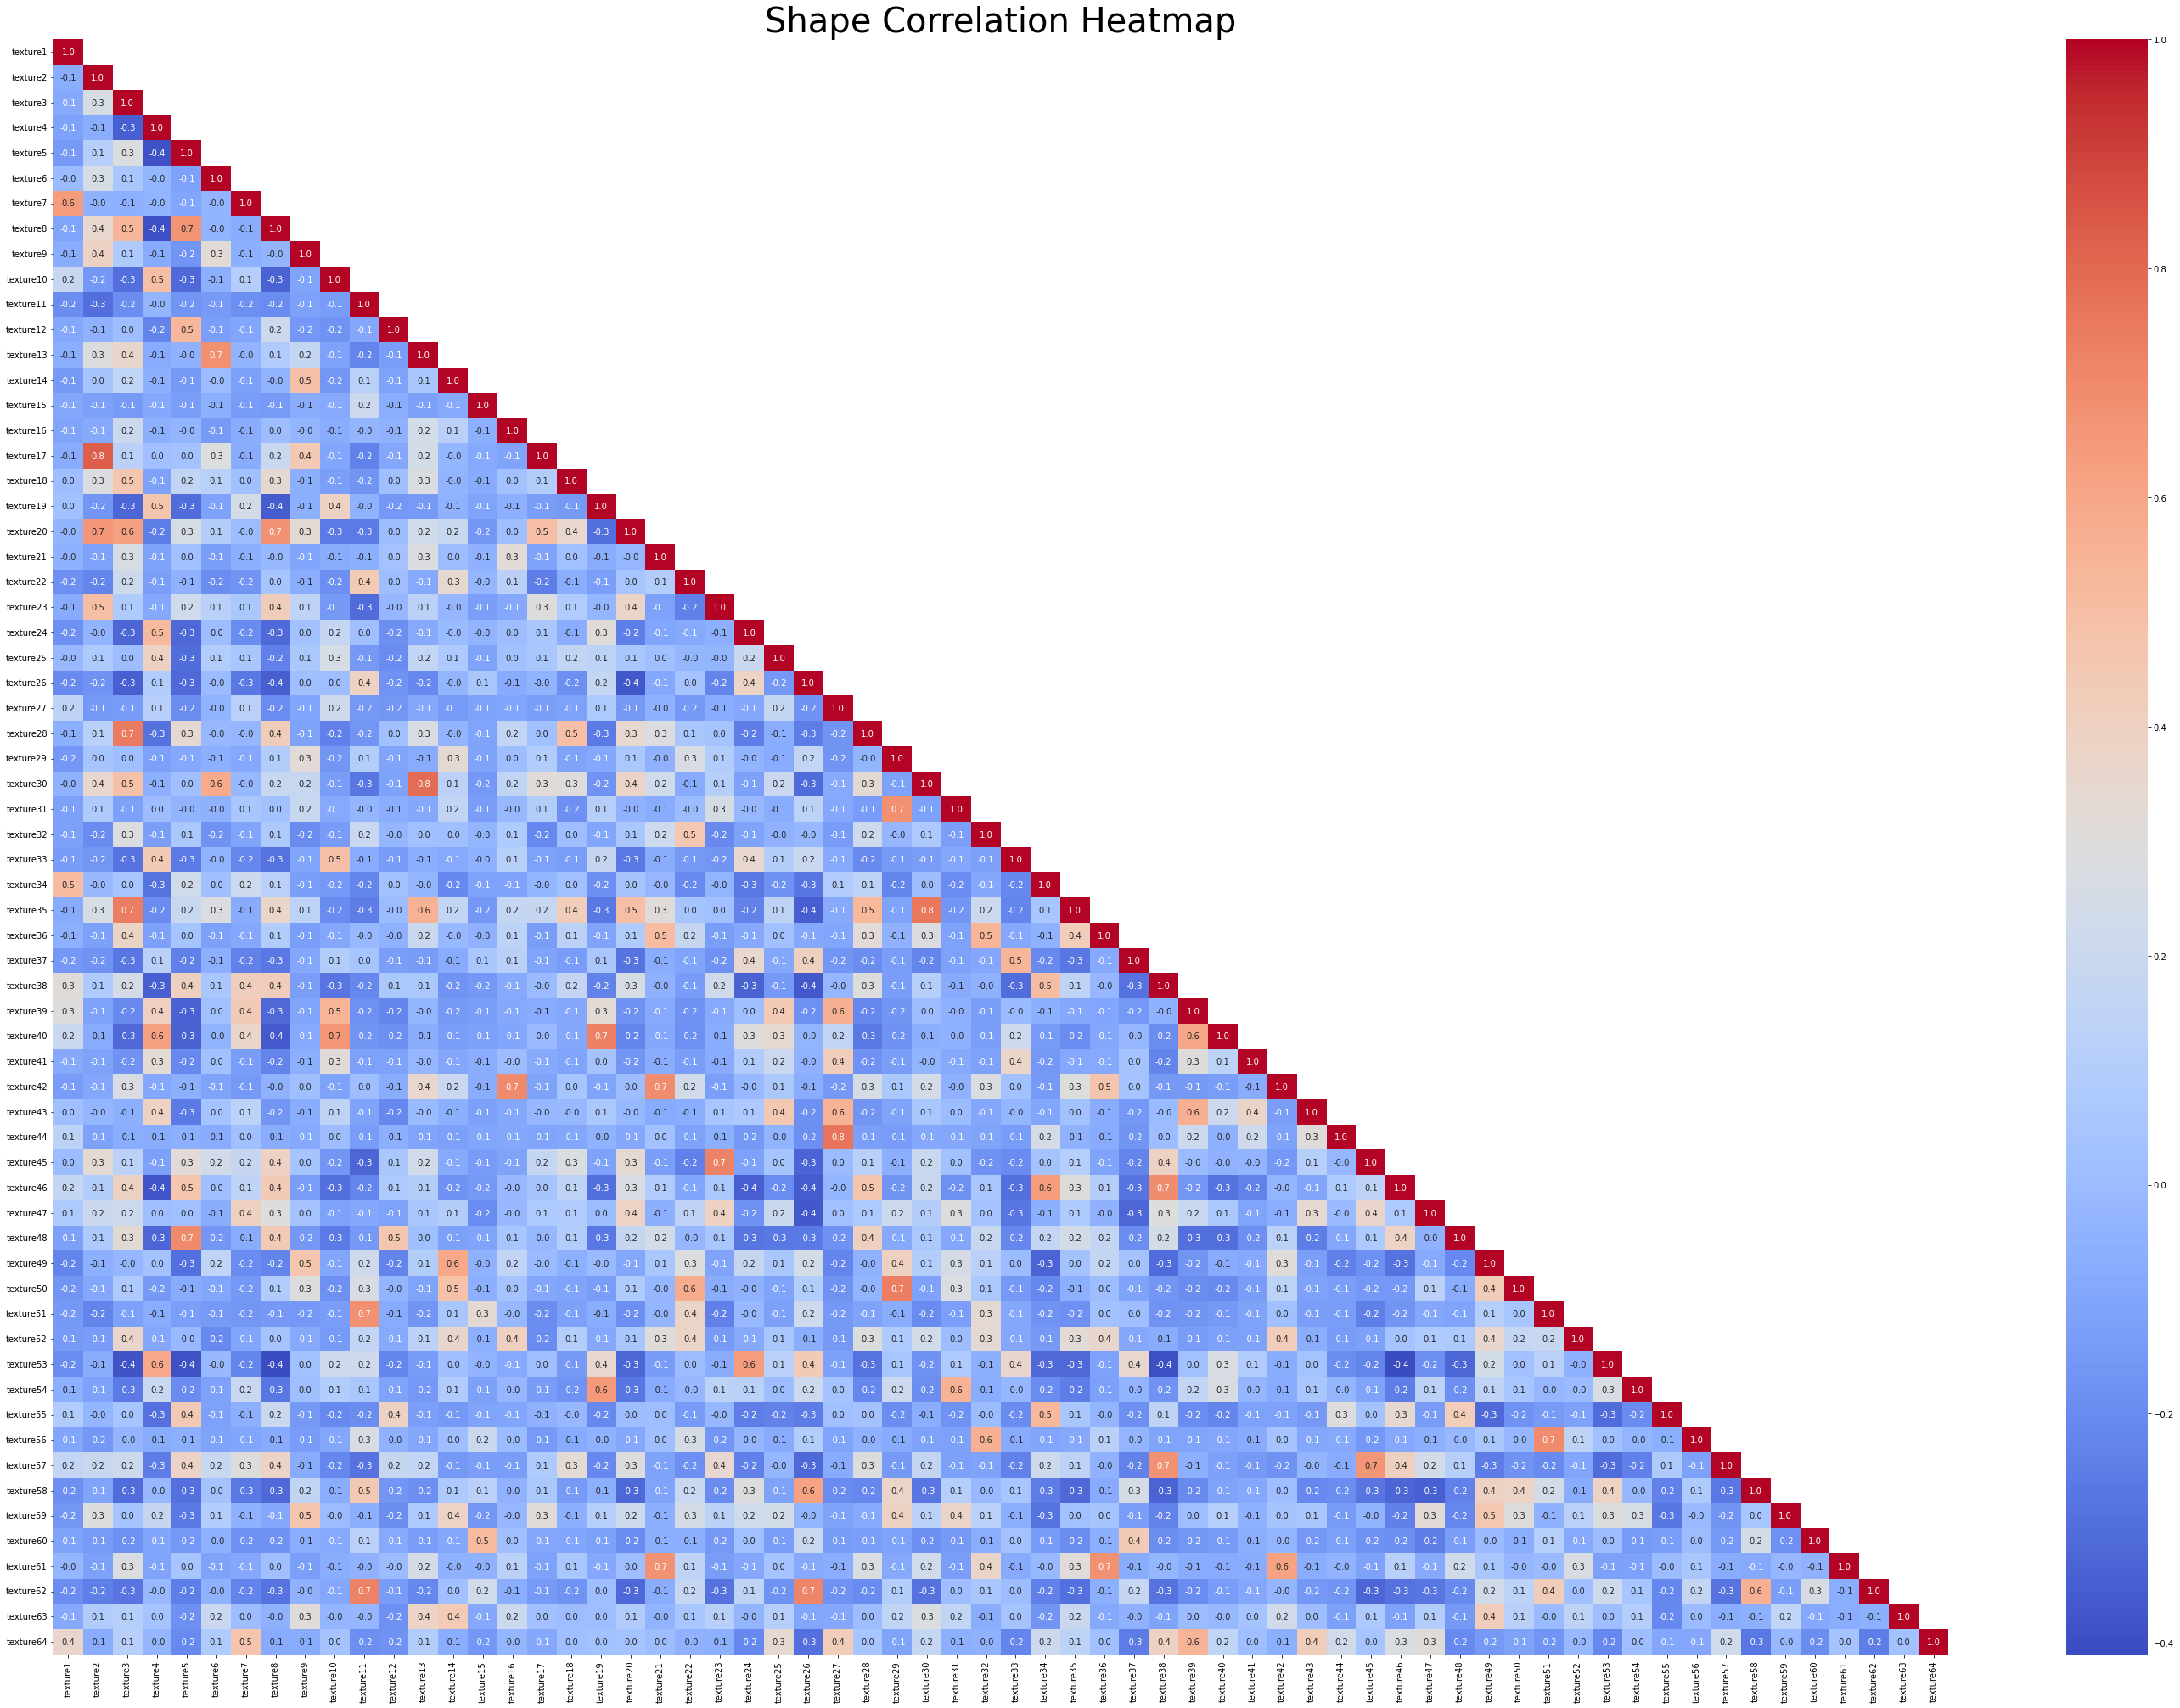

In [22]:
texture_correlation_matrix = train_df.loc[:, 'texture1':'texture64'].corr()
plt.figure(figsize=(50, 35))
sns.heatmap(texture_correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f",mask = np.triu(np.ones_like(texture_correlation_matrix, dtype=bool),k=1))
plt.title('Shape Correlation Heatmap',fontsize=40)
plt.show()

## Data Normalization

In [23]:
x = train_df.drop(['id','species'],axis = 1)
y = train_df['species']

In [24]:
columns = x.columns
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x,columns=columns)

In [25]:
x.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,...,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02
mean,-4.126890e-17,9.689219e-17,-1.471326e-16,-7.177199e-17,3.588600e-18,9.689219e-17,-1.076580e-16,1.973730e-17,3.588600e-17,1.471326e-16,...,-7.177199e-17,1.794300e-17,-4.306320e-17,7.177199e-18,-4.126890e-17,6.280049e-18,5.831474e-17,-1.184238e-16,1.794300e-17,-4.126890e-17
std,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,...,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00
min,-8.825754e-01,-7.348805e-01,-1.238218e+00,-8.197939e-01,-7.760232e-01,-7.418616e-01,-1.097116e+00,-3.950641e-01,-8.027649e-01,-1.160382e+00,...,-5.759836e-01,-2.601491e-01,-6.871513e-01,-4.629210e-01,-1.050981e+00,-2.331511e-01,-2.356099e-01,-5.200125e-01,-6.521431e-01,-8.533874e-01
25%,-7.835843e-01,-6.845911e-01,-7.089881e-01,-6.134687e-01,-6.697691e-01,-7.418616e-01,-7.623545e-01,-3.950641e-01,-5.840194e-01,-7.956363e-01,...,-5.759836e-01,-2.601491e-01,-6.450438e-01,-4.629210e-01,-7.323922e-01,-2.331511e-01,-2.356099e-01,-5.200125e-01,-6.521431e-01,-8.104541e-01
50%,-3.875689e-01,-4.331187e-01,-2.553572e-01,-3.383332e-01,-3.510068e-01,-4.413996e-01,-2.043618e-01,-3.950641e-01,-1.465284e-01,-1.876642e-01,...,-4.989298e-01,-2.601491e-01,-4.346357e-01,-4.238835e-01,-2.227028e-01,-2.331511e-01,-2.356099e-01,-4.199099e-01,-4.395818e-01,-3.384066e-01
75%,4.044112e-01,3.212727e-01,5.006684e-01,2.119027e-01,1.803181e-01,3.379315e-01,5.768053e-01,-3.950641e-01,7.221712e-02,5.418898e-01,...,1.136188e-01,-2.601491e-01,2.703630e-01,-7.270548e-02,3.507304e-01,-2.331511e-01,-2.356099e-01,8.065405e-02,2.688352e-01,4.340427e-01
max,3.572332e+00,4.545885e+00,4.810065e+00,5.163955e+00,5.280951e+00,5.229881e+00,4.147822e+00,1.100413e+01,7.728870e+00,4.919090e+00,...,6.204531e+00,1.020770e+01,6.762469e+00,7.536378e+00,5.894288e+00,9.383048e+00,1.303224e+01,9.115562e+00,5.653167e+00,5.369096e+00


## Label Encoding

In [26]:
encoder=LabelEncoder()
encoder=encoder.fit(y)
labels=encoder.transform(y)
classes=list(encoder.classes_)

In [27]:
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [28]:
labels = pd.DataFrame(labels,columns=['species'])
labels

,species
0,3
1,49
2,65
3,94
4,84
...,...
985,40
986,5
987,11
988,78


In [29]:
df_normalized_encoded = pd.concat([x,labels],axis=1)

In [30]:
df_normalized_encoded['id'] = train_df['id']

In [32]:
df_normalized_encoded.to_csv('Data/normalized_encoded.csv')